In [2]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from utils import camb_clfile
import numpy as np
import healpy as hp
import curvedsky as cs

In [3]:
cl_unl = camb_clfile("/global/cscratch1/sd/lonappan/S4BIRD/CAMB/BBSims_lenspotential.dat")

In [4]:
%load_ext autoreload
%autoreload 2
import quest 

In [5]:
clpp = quest.RecoBase.from_ini('../litebirdFG1.ini')

An extra Mask is applied to data. Previous fsky is 0.80 and new fsky = 0.70


In [6]:
e,b clpp.get_falm_sim(0)

Maps with FG


(array([[ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 2.05647302e+07+0.00000000e+00j,  5.27512296e+05+1.05753557e+06j,
          1.21082770e+06-1.82736482e+05j, ...,
          0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        ...,
        [ 1.37736212e+07-1.59326404e-08j, -1.12818799e+06-1.35661922e+06j,
          1.07623537e+07-1.28888095e+05j, ...,
          6.22594776e-02-1.46529412e-01j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [-8.60194846e+06+3.

In [ ]:
plt.loglog(clpp.Lfac*clpp.cl_unl['pp'][:clpp.Lmax+1])
plt.loglog(clpp.Lfac*clpp.mean_field_cl())

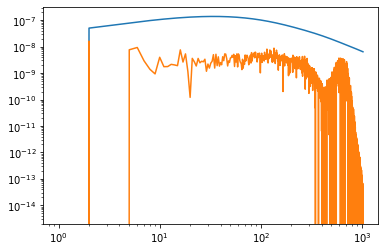

In [13]:
plt.loglog(clpp.Lfac*clpp.cl_unl['pp'][:clpp.Lmax+1])
plt.loglog(clpp.Lfac*clpp.get_qcl_sim(0))

In [7]:
#plt.loglog(clpp2.L, clpp2.Lfac*(clpp2.cl_unl['pp'][:clpp2.Lmax+1]))
#plt.errorbar(clpp2.B, clpp2.Bfac*(st2.mean(axis=0)),yerr=clpp2.Bfac*st2.std(axis=0),fmt='o')

In [8]:
# clpp2.SNR_phi(100)

In [9]:
# plt.loglog(clpp2.L,clpp2.Lfac*clpp2.mean_field_cl(),label='W FG')
# plt.loglog(clpp2.L,clpp2.Lfac*clpp1.mean_field_cl(),label='WO FG')
# plt.loglog(clpp2.L,clpp2.Lfac*clpp2.cl_unl['pp'][:clpp2.Lmax+1])
# #plt.loglog(clpp2.L,clpp1.Lfac*clpp2.norm)
# plt.legend()

In [20]:
qu1 = clpp1.get_falm_sim(1)
qu2 = clpp2.get_falm_sim(1)

Maps with FG


/tmp/ipykernel_38397/3124202591.py:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/clpp1.cl_len[2,:][:clpp1.Lmax+1],label='1/EE')


(5, 600)

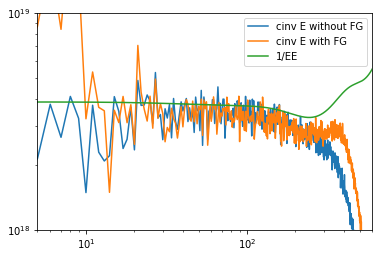

In [21]:
fg = cs.utils.alm2cl(clpp2.Lmax,qu1[1])/clpp2.fsky
nofg = cs.utils.alm2cl(clpp1.Lmax,qu2[1])/clpp1.fsky

plt.loglog(fg,label='cinv E without FG')
plt.loglog(nofg,label='cinv E with FG')
plt.loglog(1/clpp1.cl_len[2,:][:clpp1.Lmax+1],label='1/EE')
plt.legend()
plt.ylim(10**18,10**19)
plt.xlim(5,600)

/tmp/ipykernel_38397/49375302.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(fg/nofg,label='w FG/wo FG')


(50.0, 800.0)

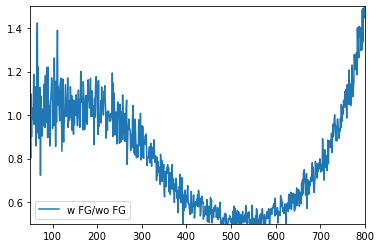

In [22]:
plt.plot(fg/nofg,label='w FG/wo FG')
plt.legend()
plt.ylim(0.5,1.5)
plt.xlim(50,800)

In [72]:
clpp1.fsky

0.7990690867106119

In [24]:
cmb = clpp1.get_cmb_sim(0)

In [25]:
cmb.shape

(3, 525825)

In [29]:
qu = clpp2.get_exp_sim(0)

Maps with FG


In [34]:
q = qu[0][0]
u = qu[1][0]

In [35]:
fg_cmb = hp.map2alm([q*0,q,u],lmax=1024)

In [36]:
fg_cmb.shape

(3, 525825)

In [46]:
n = fg_cmb - cmb

In [47]:
n.shape

(3, 525825)

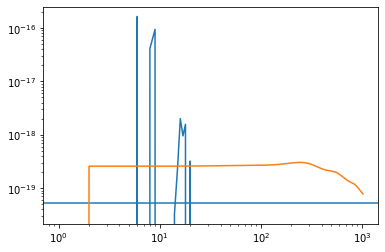

In [60]:
plt.loglog(hp.alm2cl(fg_cmb[1])-(hp.alm2cl(cmb[1])/clpp1.Tcmb**2))
plt.axhline((np.radians(2.16/60)**2)/clpp1.Tcmb**2)
plt.loglog(clpp1.cl_len[2,:])